## Outlier removal using Z Score

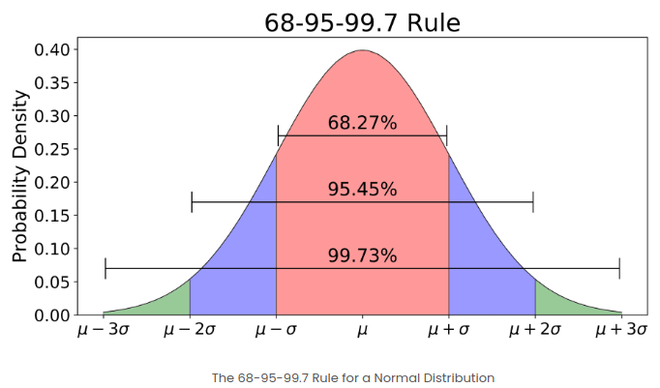

In [ ]:
# Columns using Z score should be normally distributed or near normally distributed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns



In [2]:
data = pd.read_csv("./data/insurance.csv")

In [3]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

<Axes: >

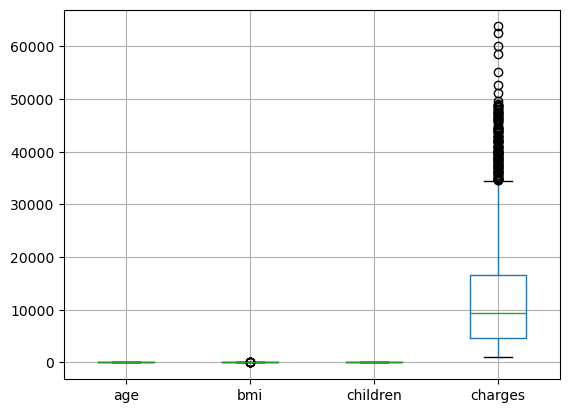

In [4]:
data.boxplot()

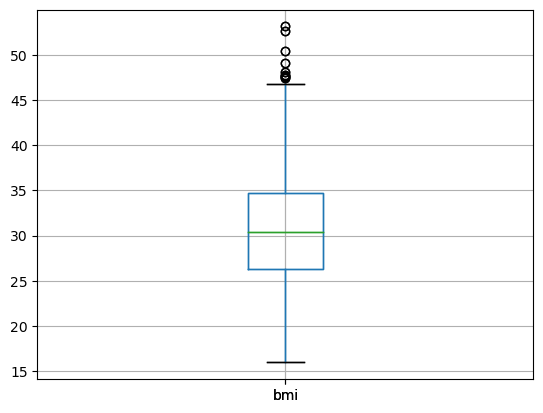

In [13]:
data[["bmi"]].boxplot()
plt.show()

age


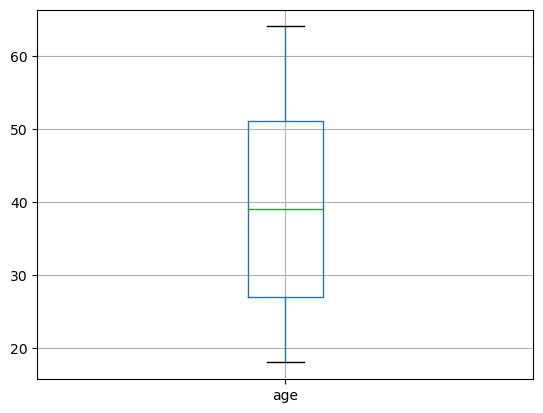


bmi


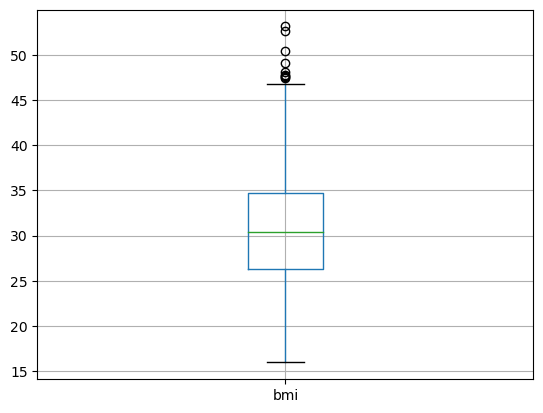


children


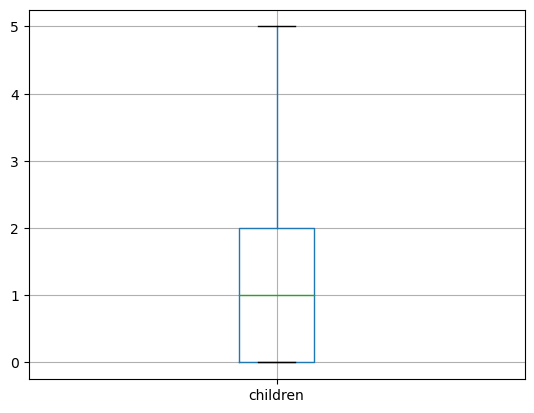


charges


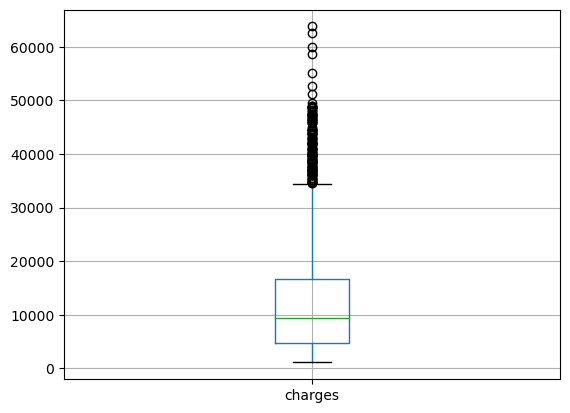

In [16]:
for col in data.select_dtypes(include = "number"):
    print(col)
    data[[col]].boxplot()
    plt.show()
    print()

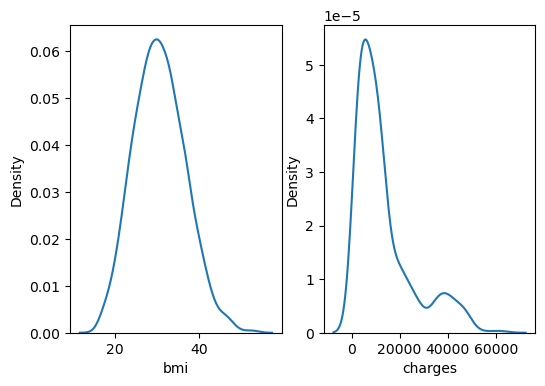

In [28]:
# plotting the distribution
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.kdeplot(data["bmi"])
#plt.show()
plt.subplot(1,2,2)
sns.kdeplot(data["charges"])
plt.show()
# Here we can see that bmi is normally distributed while charges is not normally distributed

In [32]:
# Looking at the statistics of both these columns
data[["bmi","charges"]].describe(include=np.number)

bmi       charges
count  1338.000000   1338.000000
mean     30.663397  13270.422265
std       6.098187  12110.011237
min      15.960000   1121.873900
25%      26.296250   4740.287150
50%      30.400000   9382.033000
75%      34.693750  16639.912515
max      53.130000  63770.428010

In [33]:
# Using Zscore to detect outliers in BMI col as it is normally distributed  

In [36]:
# Finding out the boundary values
print("Lowest allowed value in BMI is {}".format(data["bmi"].mean()-3*data["bmi"].std()))
print()
print("Highest allowed value in BMI is {}".format(data["bmi"].mean()+3*data["bmi"].std()))

# Outside these limits will be considered outliers

Lowest allowed value in BMI is 12.368836125949496

Highest allowed value in BMI is 48.957957596023604


In [39]:
# Finding out outliers
data[(data["bmi"]<12.368)|(data["bmi"]>48.95)]

age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627

# Trimming

In [40]:
# Trimming the outliers

In [49]:
data_new = data[(data["bmi"]>12.368)&(data["bmi"]<48.96)]

In [51]:
data.shape, data_new.shape

((1338, 7), (1334, 7))

In [52]:
# Approach 2 
# calculating Z Score

data["bmi_zscore"] = (data["bmi"] - data["bmi"].mean())/data["bmi"].std()

In [53]:
data.head()

age     sex     bmi  children smoker     region      charges  bmi_zscore
0   19  female  27.900         0    yes  southwest  16884.92400   -0.453151
1   18    male  33.770         1     no  southeast   1725.55230    0.509431
2   28    male  33.000         3     no  southeast   4449.46200    0.383164
3   33    male  22.705         0     no  northwest  21984.47061   -1.305043
4   32    male  28.880         0     no  northwest   3866.85520   -0.292447

In [54]:
# We want to keep only those BMIs_Zscore that are within -3 & +3

In [55]:
data[data["bmi_zscore"]>3]

age   sex    bmi  children smoker     region     charges  bmi_zscore
116    58  male  49.06         0     no  southeast  11381.3254    3.016733
847    23  male  50.38         1     no  southeast   2438.0552    3.233191
1047   22  male  52.58         1    yes  southeast  44501.3982    3.593954
1317   18  male  53.13         0     no  southeast   1163.4627    3.684145

In [56]:
data[data["bmi_zscore"]<-3]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmi_zscore]
Index: []

In [57]:
# Trimming

In [58]:
data_Znew = data[(data["bmi_zscore"]>-3)&(data["bmi_zscore"]<+3)]

In [59]:
data_Znew.shape

(1334, 8)

# Capping

In [66]:
lower_limit = data["bmi"].mean()-3*data["bmi"].std()
upper_limit = data["bmi"].mean()+3*data["bmi"].std()

lower_limit, upper_limit

(12.368836125949496, 48.957957596023604)

In [62]:
data["bmi_new"]=np.where(
data["bmi"]<lower_limit,lower_limit,
    np.where(
    data["bmi"]>upper_limit, upper_limit,
        data["bmi"]
    )
)

In [65]:
data[data["bmi"]!=data["bmi_new"]]

age   sex    bmi  children smoker     region     charges  bmi_zscore  \
116    58  male  49.06         0     no  southeast  11381.3254    3.016733   
847    23  male  50.38         1     no  southeast   2438.0552    3.233191   
1047   22  male  52.58         1    yes  southeast  44501.3982    3.593954   
1317   18  male  53.13         0     no  southeast   1163.4627    3.684145   

        bmi_new  
116   48.957958  
847   48.957958  
1047  48.957958  
1317  48.957958

In [67]:
# Looking at the statistics of both these columns
data[["bmi","bmi_new"]].describe(include=np.number)

bmi      bmi_new
count  1338.000000  1338.000000
mean     30.663397    30.656433
std       6.098187     6.075235
min      15.960000    15.960000
25%      26.296250    26.296250
50%      30.400000    30.400000
75%      34.693750    34.693750
max      53.130000    48.957958

# Outlier Removal Using IQR Method

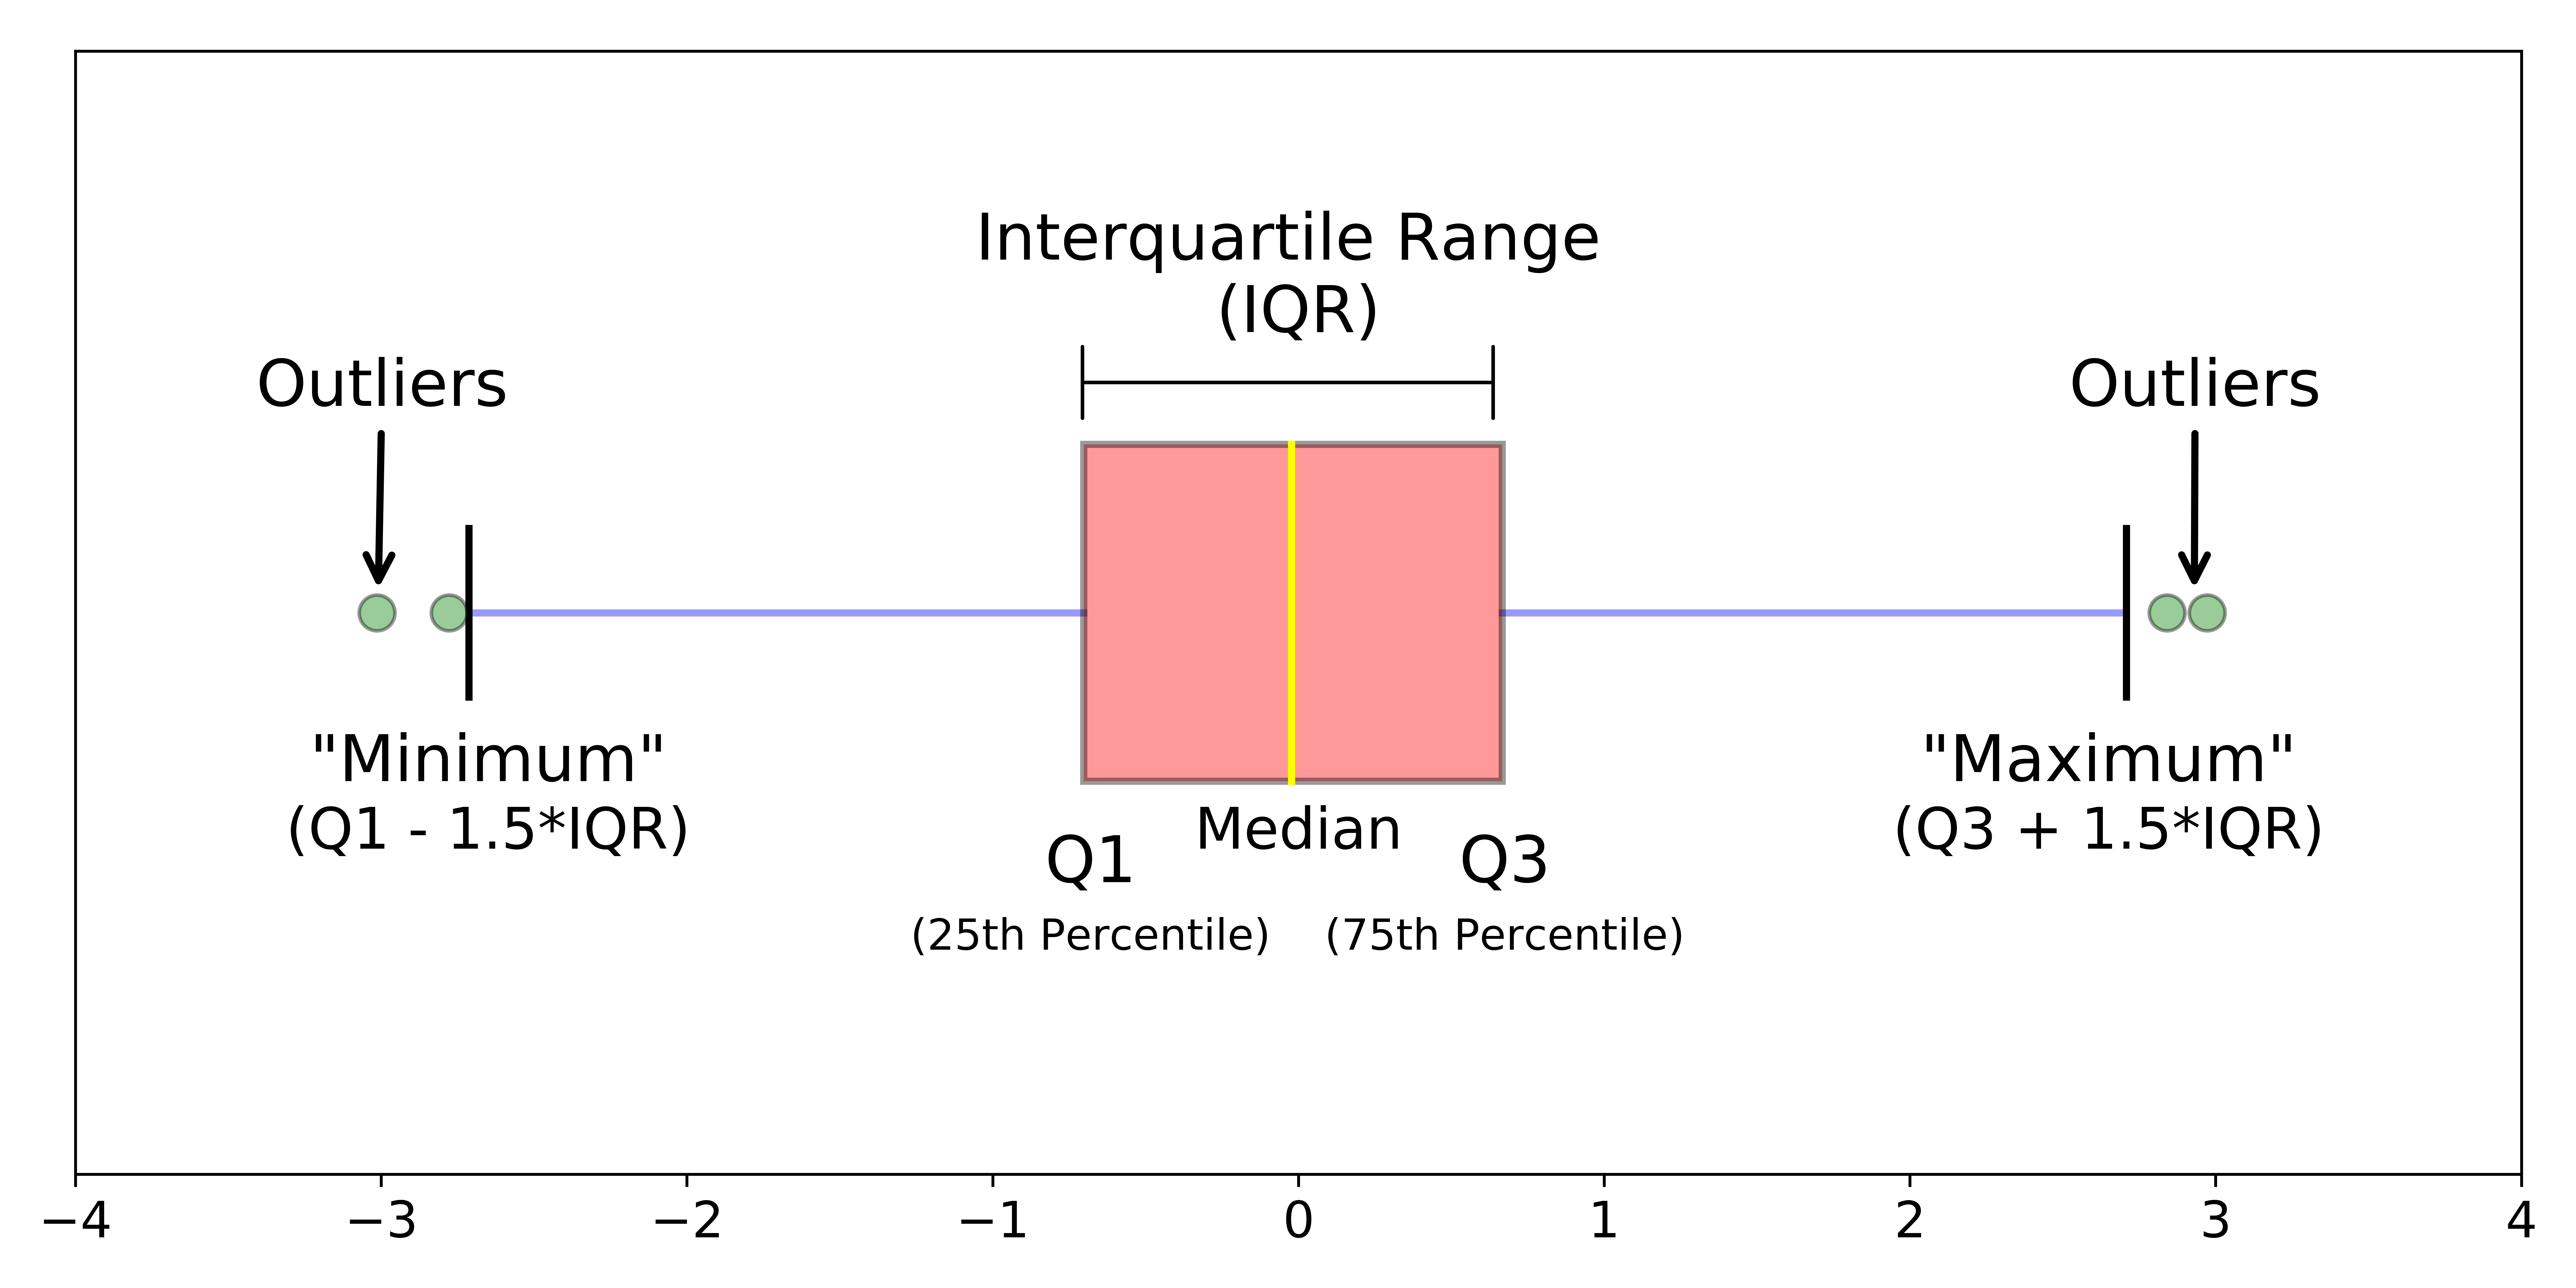

In [68]:
# This method is used when the data is skewed

- if 89 is the 100 percentil mean 100 percent of the values are below 89
- if 80 is the 75 percentil means 75 percent of the values are below 80
- IQR = Q3 - Q1 that is 75percentile - 25percentil
- IQR proximity rule - Q1-1.5IQR & Q3+1.5IQR

In [69]:
# Using the same dataset

In [72]:
data = pd.read_csv("./data/insurance.csv")

In [73]:
data.head()

age     bmi  children smoker     region      charges
0   19  27.900         0    yes  southwest  16884.92400
1   18  33.770         1     no  southeast   1725.55230
2   28  33.000         3     no  southeast   4449.46200
3   33  22.705         0     no  northwest  21984.47061
4   32  28.880         0     no  northwest   3866.85520

In [74]:
# Finding out the distribution of our data

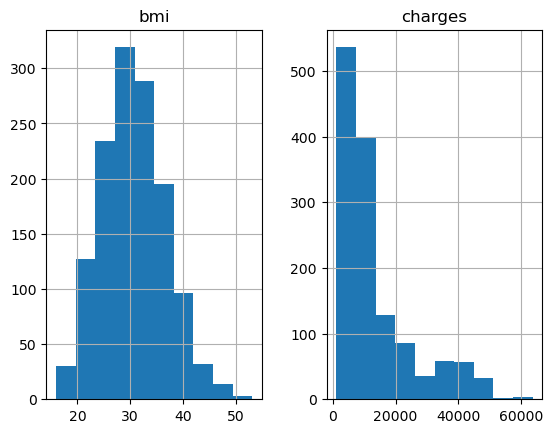

In [77]:
data[["bmi","charges"]].hist()
plt.show()

In [90]:
data[["bmi","charges"]].skew()
# Lesser the value more the distribution follows normal curve

bmi        0.284047
charges    1.515880
dtype: float64

In [91]:
import statsmodels.api as sm

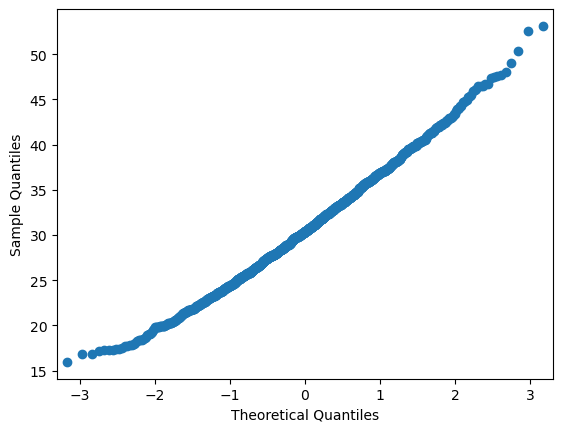

In [92]:
sm.qqplot(data["bmi"])

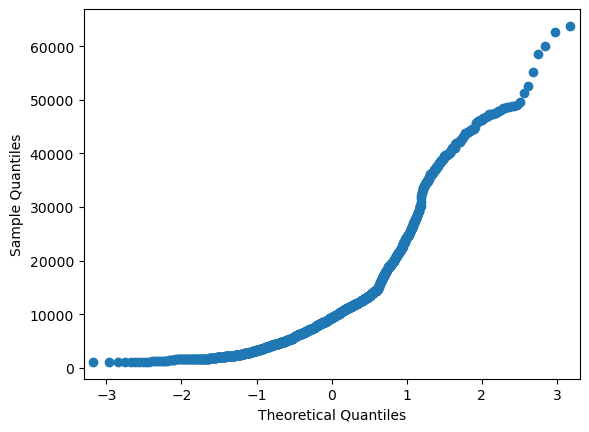

In [93]:
sm.qqplot(data["charges"])

In [94]:
data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [98]:
data["charges"].head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

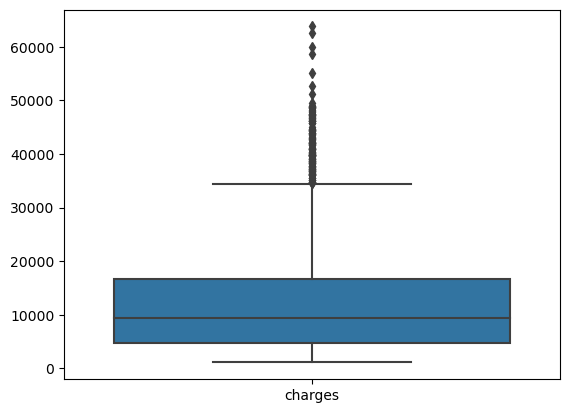

In [99]:
sns.boxplot(data[["charges"]])
plt.show()

In [100]:
# Finding the IQR 
percentile_25 = data["charges"].quantile(0.25)
percentile_75 = data["charges"].quantile(0.75)

percentile_25, percentile_75

(4740.28715, 16639.912515)

In [101]:
IQR = percentile_75 - percentile_25
IQR

11899.625365

In [102]:
lower_limit = percentile_25 - 1.5*IQR
upper_limit = percentile_75 + 1.5*IQR
lower_limit,upper_limit

(-13109.1508975, 34489.350562499996)

# Finding OUtliers

In [107]:
outliers = data[data["charges"]>upper_limit]
outliers

age     bmi  children smoker     region      charges
14     27  42.130         0    yes  southeast  39611.75770
19     30  35.300         0    yes  southwest  36837.46700
23     34  31.920         1    yes  northeast  37701.87680
29     31  36.300         2    yes  southwest  38711.00000
30     22  35.600         0    yes  southwest  35585.57600
...   ...     ...       ...    ...        ...          ...
1300   45  30.360         0    yes  southeast  62592.87309
1301   62  30.875         3    yes  northwest  46718.16325
1303   43  27.800         0    yes  southwest  37829.72420
1313   19  34.700         2    yes  southwest  36397.57600
1323   42  40.370         2    yes  southeast  43896.37630

[139 rows x 6 columns]

In [109]:
# Percentage of outliers = 
(outliers.shape[0]/data.shape[0])*100

10.388639760837071

# Trimming

In [110]:
data_trim = data[data["charges"]<upper_limit]

In [114]:
data.shape, data_trim.shape

((1338, 6), (1199, 6))

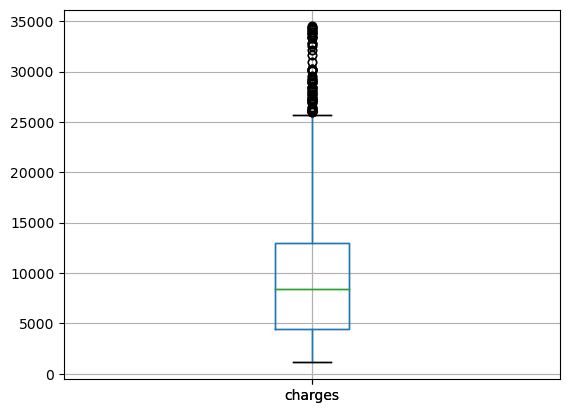

In [113]:
data_trim[["charges"]].boxplot()
plt.show()

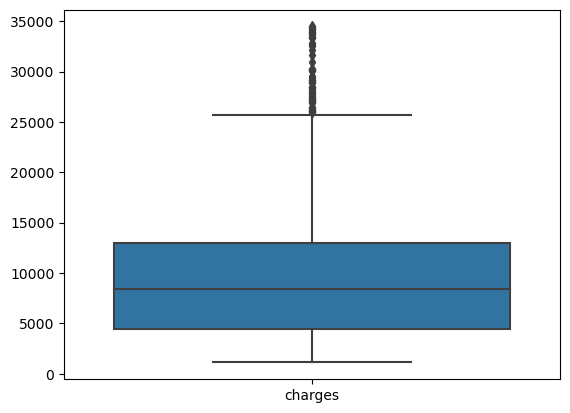

In [115]:
sns.boxplot(data_trim[["charges"]])
plt.show()

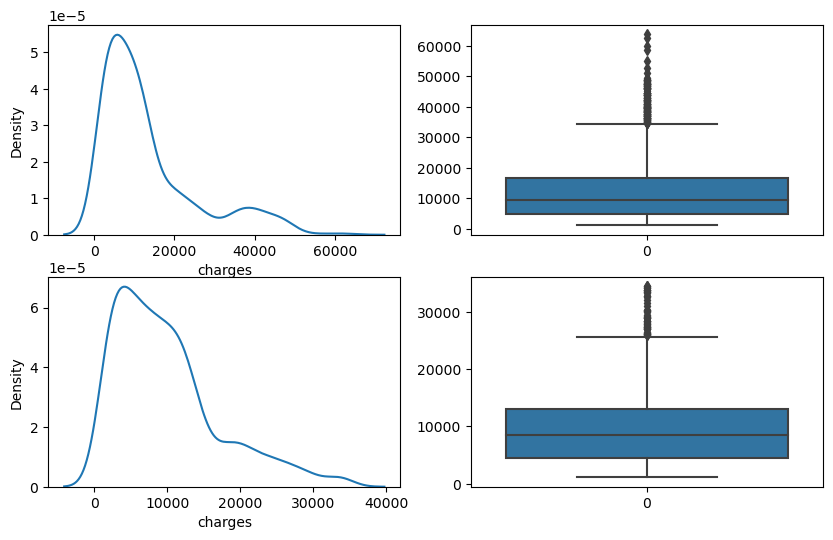

In [122]:
# Comparing
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.kdeplot(data["charges"])

plt.subplot(2,2,2)
sns.boxplot(data["charges"])

plt.subplot(2,2,3)
sns.kdeplot(data_trim["charges"])

plt.subplot(2,2,4)
sns.boxplot(data_trim["charges"])

plt.show()

# Capping 

In [123]:
data_cap = data.copy()

In [124]:
data_cap["charges_new"]=np.where(
data_cap["charges"]<lower_limit,lower_limit,
    np.where(
    data_cap["charges"]>upper_limit, upper_limit,
        data_cap["charges"]
    )
)

In [125]:
data_cap

age     bmi  children smoker     region      charges  charges_new
0      19  27.900         0    yes  southwest  16884.92400  16884.92400
1      18  33.770         1     no  southeast   1725.55230   1725.55230
2      28  33.000         3     no  southeast   4449.46200   4449.46200
3      33  22.705         0     no  northwest  21984.47061  21984.47061
4      32  28.880         0     no  northwest   3866.85520   3866.85520
...   ...     ...       ...    ...        ...          ...          ...
1333   50  30.970         3     no  northwest  10600.54830  10600.54830
1334   18  31.920         0     no  northeast   2205.98080   2205.98080
1335   18  36.850         0     no  southeast   1629.83350   1629.83350
1336   21  25.800         0     no  southwest   2007.94500   2007.94500
1337   61  29.070         0    yes  northwest  29141.36030  29141.36030

[1338 rows x 7 columns]

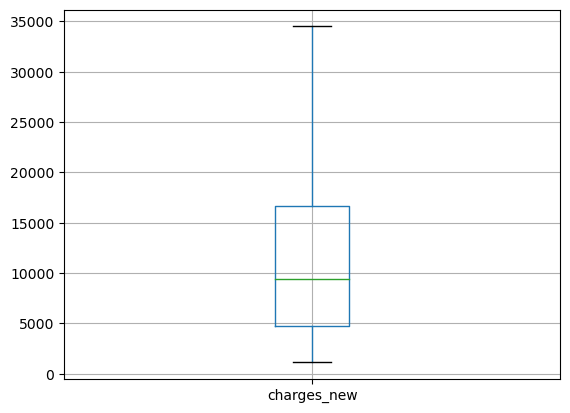

In [127]:
data_cap[["charges_new"]].boxplot()
plt.show()

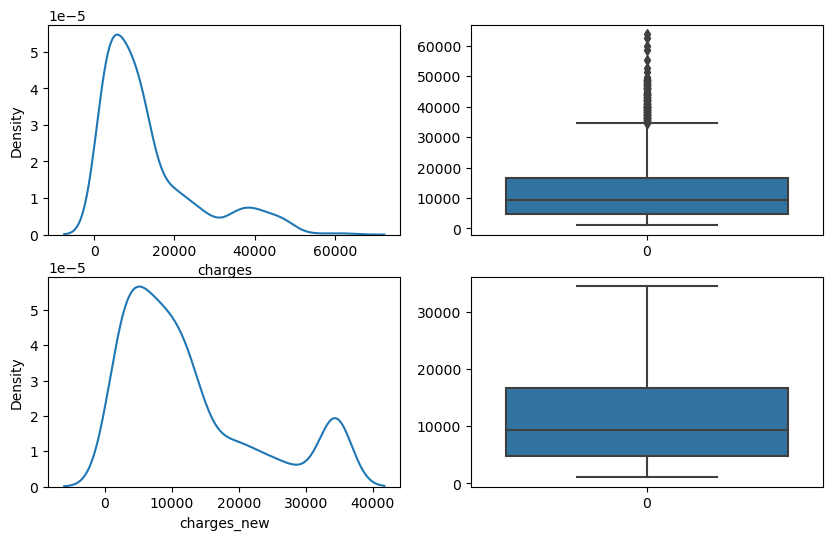

In [128]:
# Comparing
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.kdeplot(data["charges"])

plt.subplot(2,2,2)
sns.boxplot(data["charges"])

plt.subplot(2,2,3)
sns.kdeplot(data_cap["charges_new"])

plt.subplot(2,2,4)
sns.boxplot(data_cap["charges_new"])

plt.show()

# Winsorization
- Capping using percentile method is called Winsorization
- We decide the upper & lower threshold limit
- Generally this limit is 1 & 99 percentile

In [133]:
data = pd.read_csv("./data/weight-height.csv")

In [134]:
data.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

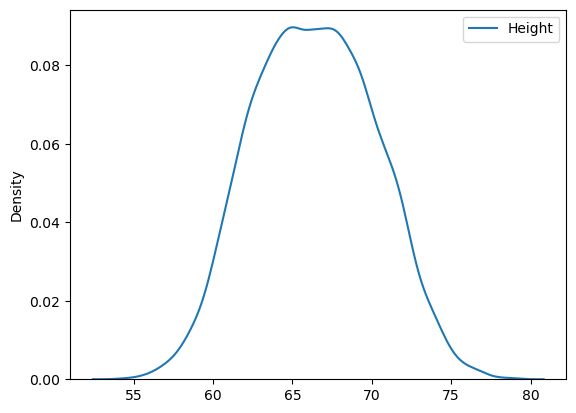

In [145]:
sns.kdeplot(data[["Height"]])
plt.show()
# ALmost normally distributed

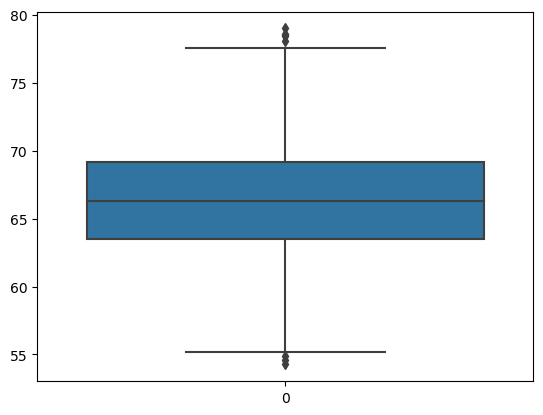

In [146]:
sns.boxplot(data["Height"])
plt.show()

In [149]:
# 99 percetile is our upper limit
# 1 percentile is our lower limit
# Remember gap should be same (99,1) or (95,5) or (90,10)
upper_limit = data["Height"].quantile(0.99)
lower_limit = data["Height"].quantile(0.01)
upper_limit,lower_limit

(74.7857900583366, 58.13441158671655)

In [151]:
data[(data["Height"]>=upper_limit)|(data["Height"]<=lower_limit)]
# Outliers in ourdataset are

Gender     Height      Weight
23      Male  75.205974  228.761781
190     Male  76.709835  235.035419
197     Male  75.944460  231.924749
202     Male  75.140821  224.124271
215     Male  74.795375  232.635403
...      ...        ...         ...
9761  Female  56.975279   90.341784
9825  Female  55.979198   85.417534
9895  Female  57.740192   93.652957
9904  Female  57.028857  101.202551
9978  Female  57.375759  114.192209

[200 rows x 3 columns]

In [155]:
data[(data["Height"]>=upper_limit)|(data["Height"]<=lower_limit)].shape

(200, 3)

In [154]:
data_new = data[(data["Height"]<=upper_limit)&(data["Height"]>=lower_limit)]
# New dataset
data_new.shape

(9800, 3)

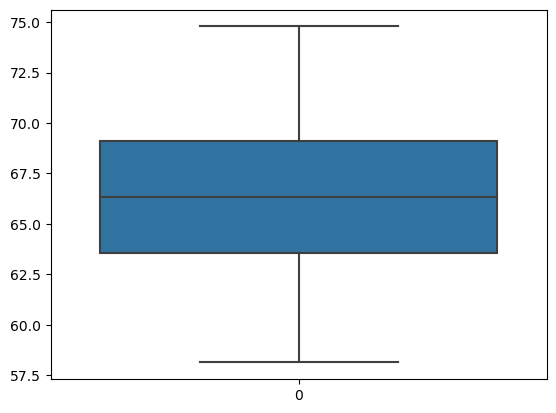

In [156]:
sns.boxplot(data_new["Height"])
plt.show()

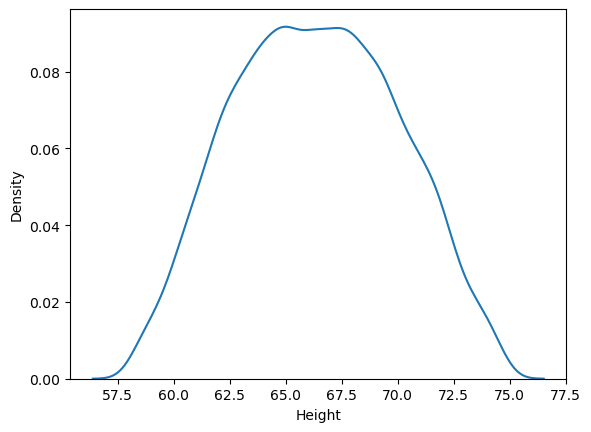

In [158]:
sns.kdeplot(data_new["Height"])
plt.show()
# Almost same distribution

In [159]:
# Winsorization - Capping


In [161]:
data["Height"]=np.where(
data["Height"]<lower_limit,lower_limit,
    np.where(
    data["Height"]>upper_limit, upper_limit,
        data["Height"]
    )
)

In [162]:
data.shape

(10000, 3)

In [164]:
data["Height"].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

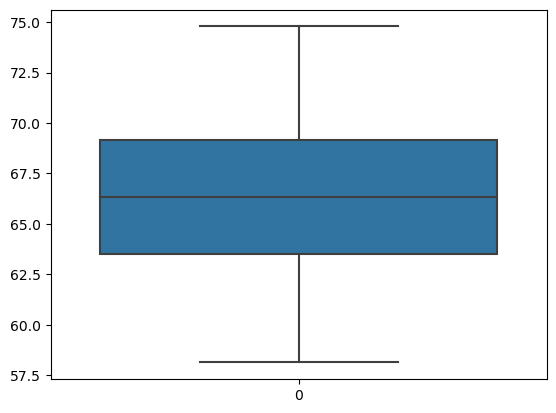

In [165]:
sns.boxplot(data["Height"])
plt.show()

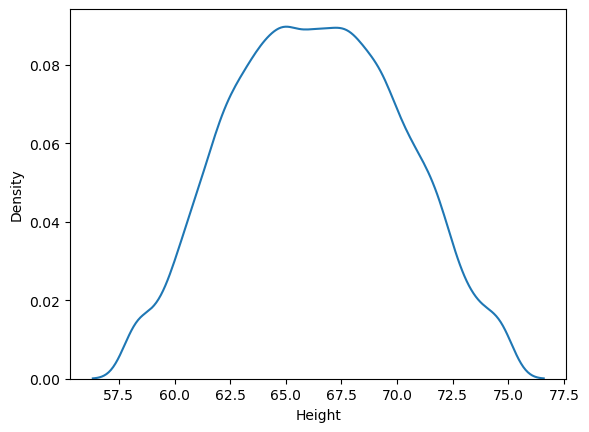

In [166]:
sns.kdeplot(data["Height"])
plt.show()